## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x,y = mnist['data'],mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
some_digit = x[34]
some_digit_image = some_digit.reshape(28,28) # Reshaping it


(-0.5, 27.5, 27.5, -0.5)

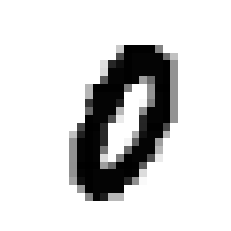

In [9]:
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation = "nearest")
plt.axis("off")

In [10]:
y[391]

'2'

In [11]:
x_train, x_test =  x[0:6000],x[6000:7000]

In [12]:
y_train, y_test =  y[0:6000],y[6000:7000]

In [13]:
import numpy as np
shuffle_index = np.random.permutation(6000)
x_train= x_train[shuffle_index]
y_train = y_train[shuffle_index]

In [14]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [15]:
y_train2 = (y_train == 2)
y_test2 = (y_test == 2)

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(tol = 0.1)

In [17]:
clf.fit(x_train,y_train2)

c:\python 38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [18]:
clf.predict([some_digit])

array([False])

In [19]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train2, cv = 3,scoring = 'accuracy')

c:\python 38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python 38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [20]:
a.mean()

0.9586666666666667

In [21]:
model = []
for i in range(10):
    model.append(LogisticRegression(tol = 0.1))

In [22]:
for i in range(10):
    model[i].fit(x_train,(y_train  == i))

c:\python 38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python 38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [23]:
model[2].predict([some_digit])

array([False])

Enter a number from 0 to 5999
655
You entered 655
ans is  4


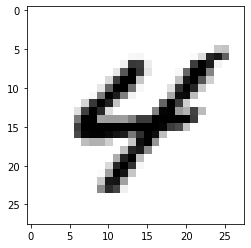

In [26]:

  
    print("Enter a number from 0 to 5999")
    some_digit = int(input())
    if(some_digit < 0 or some_digit>5999):
        print("Wrong Input")
        exit(0)
    print("You entered",some_digit)
    some_digit = x[some_digit]
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation = "nearest")
    mx = 0
    for i in range(10):
        ex = model[i].predict_proba([some_digit])[:,1]
        if(ex[0] > mx):
            ans = i
            mx = ex
    print("ans is ",ans)
